In [1]:
import numpy as np

In [2]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
df = pd.read_csv('/content/archive (5).zip')

In [12]:
df = df.iloc[:,2:]

In [13]:
df.sample(5)

,Age,EstimatedSalary,Purchased
89,35,50000,0
196,30,79000,0
135,23,63000,0
224,35,60000,0
330,38,51000,0


**Train** **test** **split**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

**StandardScaler**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set , it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [18]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [19]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [20]:
np.round(x_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


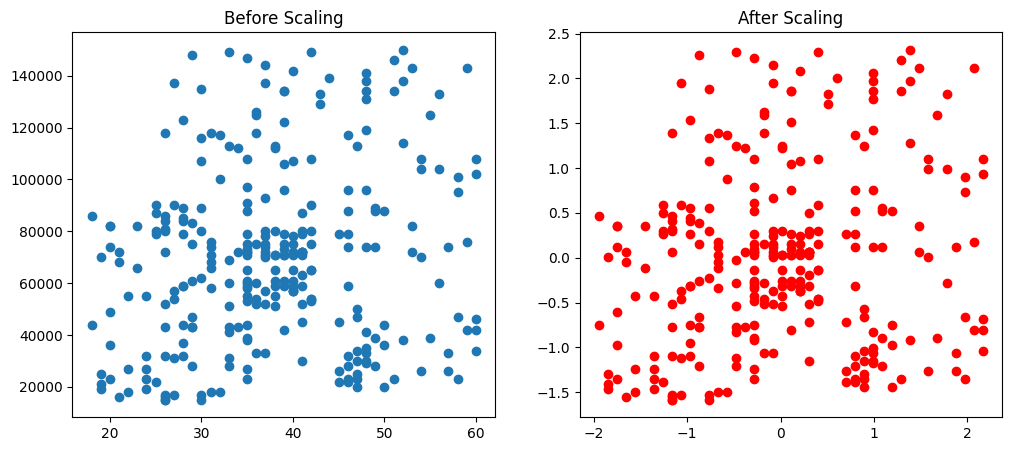

In [21]:
fig, (ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

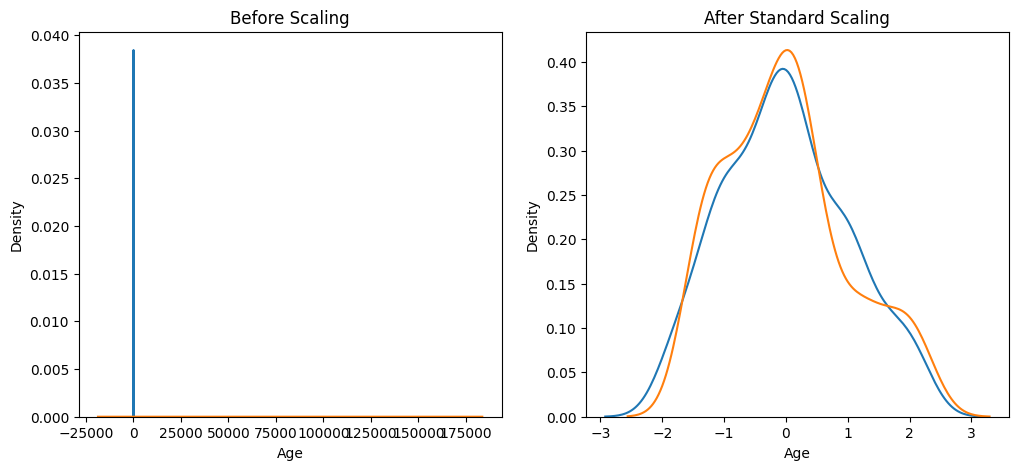

In [23]:
fig, (ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

#before scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

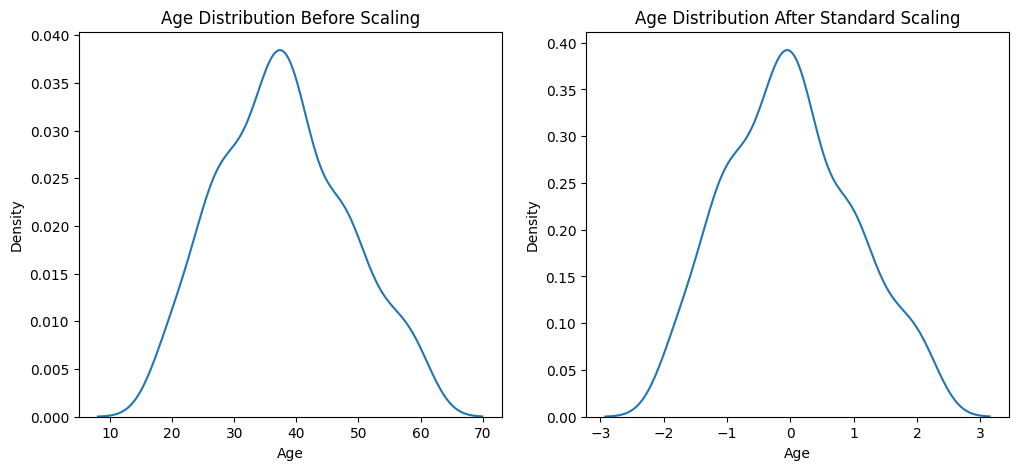

In [24]:
fig, (ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

#before scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

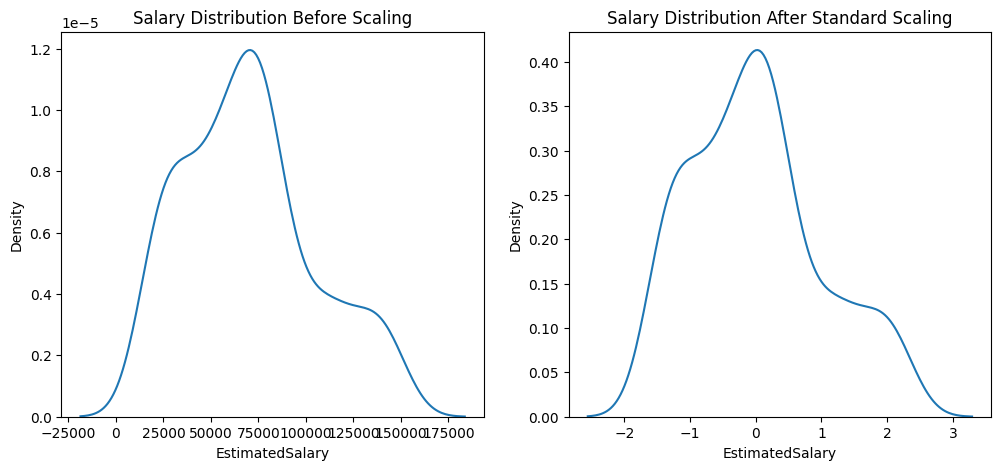

In [25]:
fig, (ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

#before scaling
ax2.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

**Why scaling is important?**


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [38]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [40]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [41]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Effect of Outlier**

In [47]:
df = pd.DataFrame({
    'Age': [25, 45, 30],
    'EstimatedSalary': [50000, 150000, 80000],
    'Purchased': [0, 1, 0]
})

# New rows to add
new_rows = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Append using pd.concat (recommended replacement for append)
df = pd.concat([df, new_rows], ignore_index=True)

print(df)

   Age  EstimatedSalary  Purchased
0   25            50000          0
1   45           150000          1
2   30            80000          0
3    5             1000          0
4   90           250000          1
5   95           350000          1


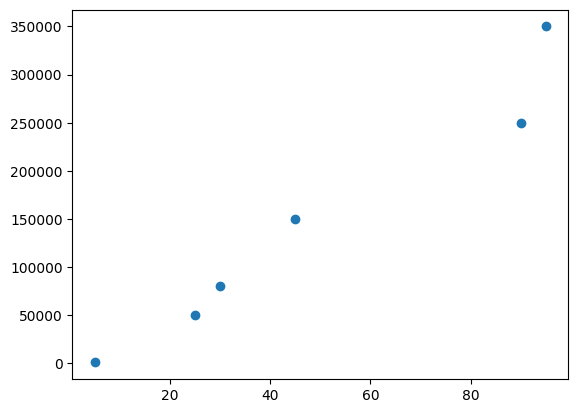

In [48]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((4, 2), (2, 2))

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to the train set it will learn the parameter
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

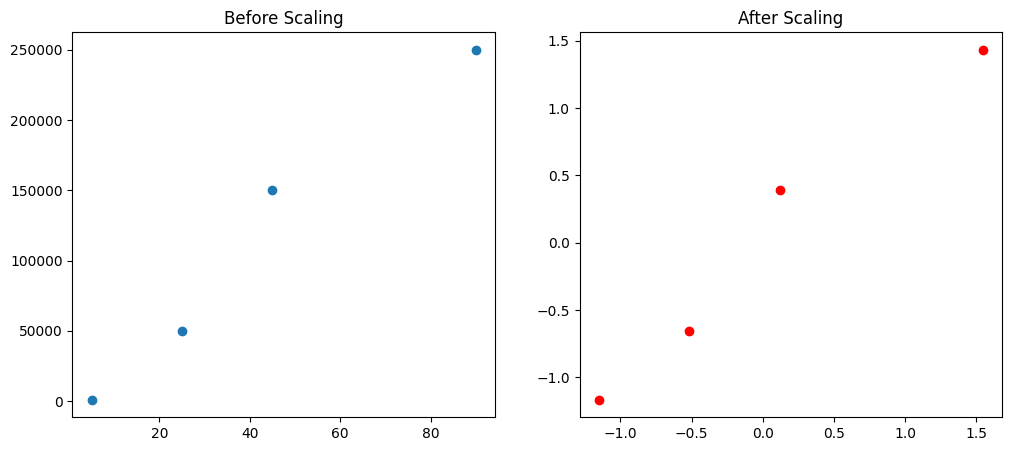

In [56]:
fig, (ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()